# Estimation in a Mixture Model

In this project, I have the data $({X_i})_i\epsilon \mathfrak{N}$, where $(\mathfrak{N} = {1,...,n})$

Each $x_i$ is a 3-d data observation or data with 3 features, and I have the following distributions

$$X_{1|Y}\sim N(\mu_y;\sigma_Y^2)$$
$$X_{2|Y}\sim exp(\lambda_Y)$$
$$X_{3|Y}\sim Cat_Y(K)$$

I will perform various estimations on this data set and doing the classfication using th Expectation Maximisation estimation 

In mixture models, the labels are not observed, so the estimation of model parameters is performed without labeled data. The underlying assumption is that the data are generated by randomly selecting a (hidden) label and then, given that label, the features are randomly selected from a distribution that depends on that label.

For example, the Gaussian mixture model assumes that, conditional on the label, points in feature space are normally distributed. The exponential mixture model assumes that, conditional on the label, points in feature space are exponentially distributed.

As a result, samples are generated from a weighted average of the conditional distributions.

In [1]:
## import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# 1. Import Dataset

In [2]:
data = pd.read_csv("Data.csv",header=None)

# select the first three columns from the dataframe
data = data.iloc[:,:3]

# preview the data
data.columns = ["X1","X2","X3"]

In [3]:
# review the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   X3      1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [4]:
# review the data information
data.describe()

,X1,X2,X3
count,1000.000000,1000.000000,1000.00000
mean,0.297597,2.930605,3.26500
std,1.309530,6.314729,1.11086
min,-3.073000,0.000000,1.00000
25%,-0.945225,0.086825,3.00000
50%,0.053100,0.592550,3.00000
75%,1.529950,2.148125,4.00000
max,3.703800,66.449500,5.00000


From the data table, we could notice that $X_1$ and $X_2$ are continuous variables, $X_3$ is categorical variable.

Check for the rows containing 0 value in feature X2

In [5]:
data.iloc[702,:]

X1    2.7038
X2    0.0000
X3    5.0000
Name: 702, dtype: float64

In [6]:
data.iloc[933,:]

X1    1.7522
X2    0.0000
X3    1.0000
Name: 933, dtype: float64

We deleted these two rows in the following analysis.

In [7]:
data_processed = data.drop([702,933])

In [8]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      998 non-null    float64
 1   X2      998 non-null    float64
 2   X3      998 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 31.2 KB


## 2. Explore the Univariate Empirical Distributions of Each Feature

### 2.1 Univariate Distribution of Feature $X_1$

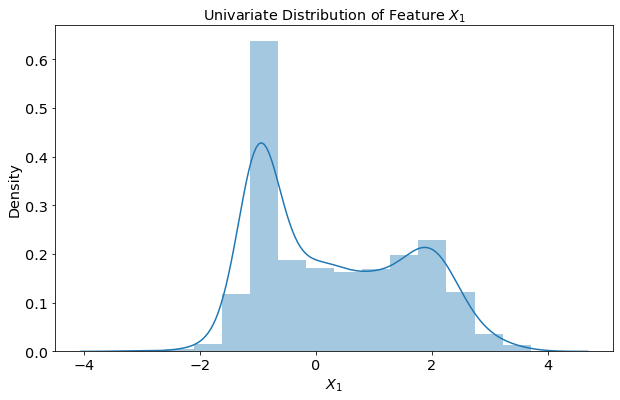

In [9]:
# univariate distribution of feature X1
fig, ax=plt.subplots(figsize=(10,6))
sns.distplot(data_processed['X1']);
plt.xlabel(r'$X_1$');
plt.title("Univariate Distribution of Feature $X_1$");

### 2.2 Univariate Distribution of Feature $X_2$

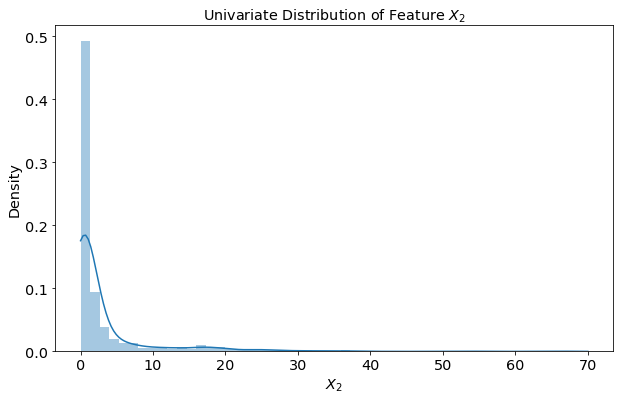

In [10]:
# univariate distribution of feature X2
fig, ax=plt.subplots(figsize=(10,6))
sns.distplot(data_processed['X2'],kde_kws={'clip': (0.0, 70.0)});
plt.xlabel(r'$X_2$');
plt.title("Univariate Distribution of Feature $X_2$");

### 2.3 Univariate Distribution of Feature $X_3$

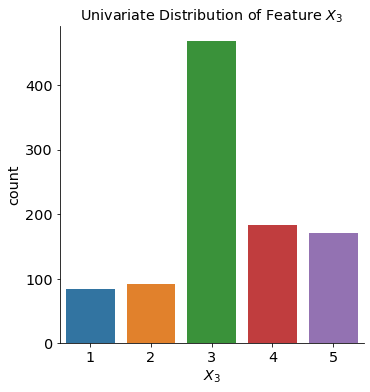

In [11]:
# univariate distribution of feature X3
sns.catplot(x="X3",kind="count",data=data_processed);
plt.xlabel(r'$X_3$');
plt.title('Univariate Distribution of Feature $X_3$');

I note that $X_3$ has 5 categories.

## 3. Explore the Pairwise Bivariate Empirical Distribution Among Three Features

To explore the pairwise bivariate empirical distribution, I investigated the empirical distribution of $X_1|X_3$, $X_2|X_3$ and the relationship between $X_1$ and $X_2$

### 3.1 Pairwise Bivariate Empirical Distribution between $X_1$ and $X_3$

I first use a box plot, to explore the $X_1$ empirical distribution given each category of $X_3$.

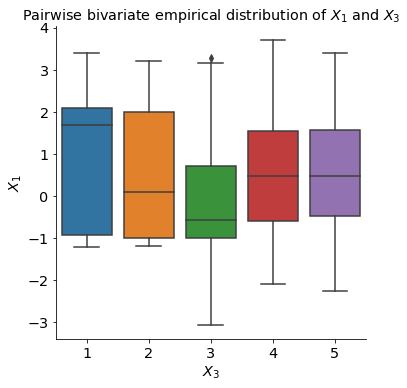

In [12]:
# pairwise bivariate empirical distribution of X1 & X3
sns.catplot(x="X3", y="X1", kind="box", data=data_processed);
plt.xlabel(r'$X_3$');
plt.ylabel(r'$X_1$');
plt.title('Pairwise bivariate empirical distribution of $X_1$ and $X_3$');

Then, I generate a kde plot to visualize $X_1$ distribution given each category of $X_3$.

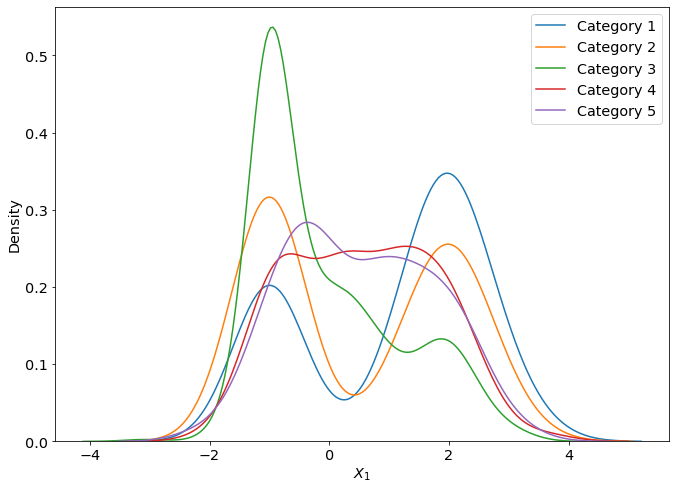

In [13]:
fig, ax = plt.subplots(figsize=(11,8))
for i in range(1,6):
    sns.kdeplot(data_processed[data_processed['X3']==i].iloc[:,0],label='Category ' + str(i))
plt.xlabel(r'$X_1$')
plt.legend(loc='best');

### 3.2 Pairwise Bivariate Empirical Distribution between $X_2$ and $X_3$

I first use a box plot, to explore the $X_2$ empirical distribution given each category of $X_3$.

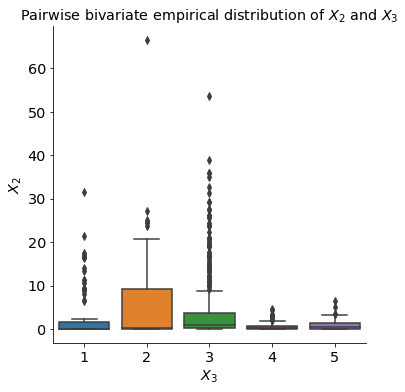

In [14]:
# pairwise bivariate empirical distribution of X2 & X3
sns.catplot(x="X3",y="X2",kind="box",data=data_processed);
plt.xlabel(r'$X_3$');
plt.ylabel(r'$X_2$');
plt.title('Pairwise bivariate empirical distribution of $X_2$ and $X_3$');

Because the boxplot of this pairwise bivariate empirical distribution was not quite clear, I use several other plots to explore this item.

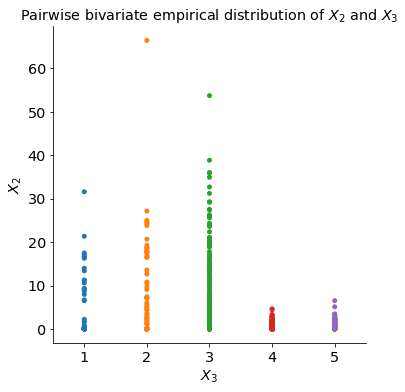

In [15]:
# pairwise bivariate empirical distribution of X2 & X3
sns.catplot(x="X3",y="X2",jitter=False,data=data_processed);
plt.xlabel(r'$X_3$');
plt.ylabel(r'$X_2$');
plt.title('Pairwise bivariate empirical distribution of $X_2$ and $X_3$');

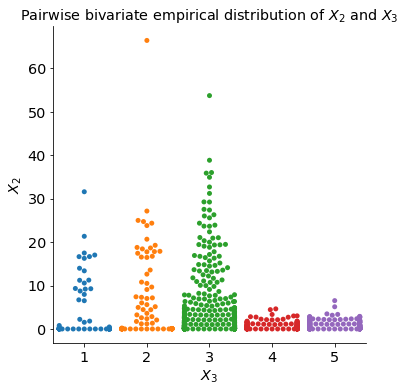

In [16]:
# pairwise bivariate empirical distribution of X2 & X3
sns.catplot(x="X3",y="X2",kind="swarm",data=data_processed);
plt.xlabel(r'$X_3$');
plt.ylabel(r'$X_2$');
plt.title('Pairwise bivariate empirical distribution of $X_2$ and $X_3$');

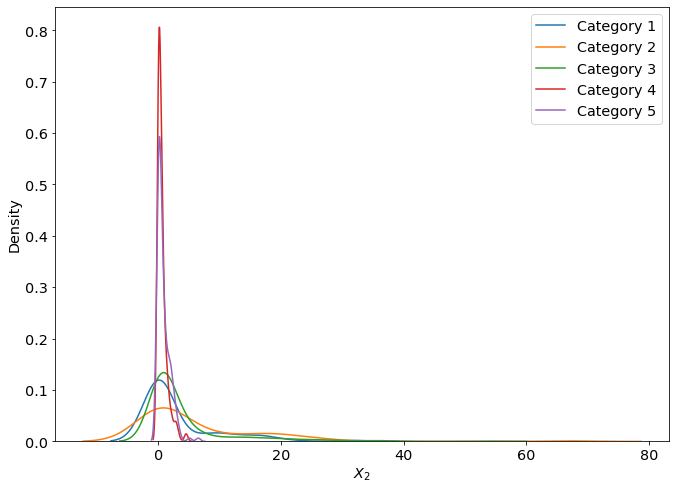

In [17]:
fig, ax = plt.subplots(figsize=(11,8))
for i in range(1,6):
    sns.kdeplot(data[data['X3']==i].iloc[:,1],label='Category ' + str(i))
plt.xlabel(r'$X_2$')
plt.legend(loc='best');

### 3.3 Pairwise Bivariate Empirical Distribution between $X_1$ and $X_2$

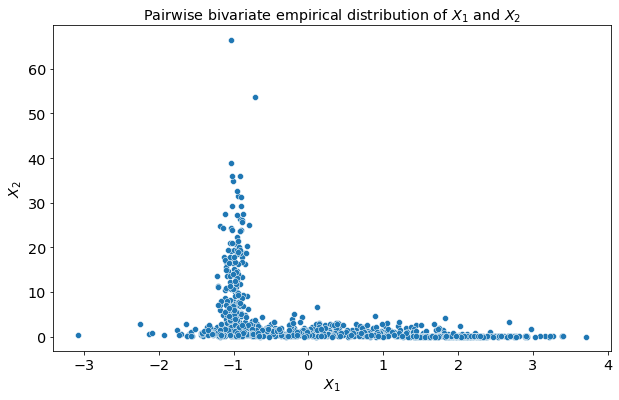

In [18]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x="X1",y="X2",data=data_processed);
plt.xlabel(r'$X_1$');
plt.ylabel(r'$X_2$');
plt.title('Pairwise bivariate empirical distribution of $X_1$ and $X_2$');

## 4. Dependence Between Features

To ensure I have a categorical feature, I first create a new dataframe where feature $X_3$ has a categorical datatype.

In [19]:
data_processed['X3 category'] = pd.Categorical(data_processed['X3'])

In [20]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   X1           998 non-null    float64 
 1   X2           998 non-null    float64 
 2   X3           998 non-null    int64   
 3   X3 category  998 non-null    category
dtypes: category(1), float64(2), int64(1)
memory usage: 72.4 KB


In [21]:
d = {'X1':data_processed['X1'],'X2':data_processed['X2'],'X3':data_processed['X3 category']}
data_category = pd.DataFrame(data=d)
data_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      998 non-null    float64 
 1   X2      998 non-null    float64 
 2   X3      998 non-null    category
dtypes: category(1), float64(2)
memory usage: 64.6 KB


In [22]:
data_category

,X1,X2,X3
0,2.9169,0.1032,5
1,-1.3077,1.2783,4
2,3.3847,0.0924,5
3,1.9685,0.0111,1
4,1.4897,0.2329,5
...,...,...,...
995,-0.8890,2.6483,3
996,-0.8361,4.4317,2
997,0.9295,0.2163,3
998,-0.6568,0.0804,3


### 4.1 $X_1$ and $X_2$ Dependence

As can be seen from the heat-map, the numerical features appear
have a negative correlation with each other.

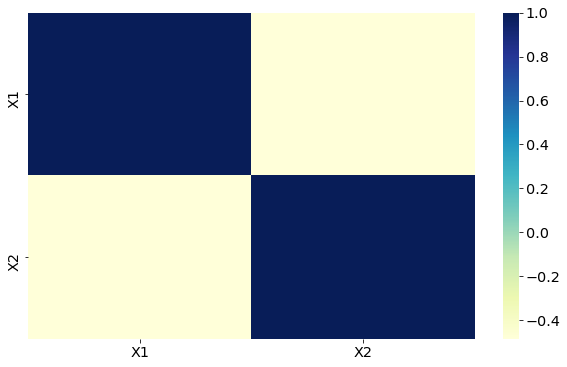

In [23]:
corr = data_category.corr(method='kendall');
ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr, cmap='YlGnBu');

As can be seen from the heat-map, the numerical features appeared have a negative correlation with each other.

To quantify the two numerical features $X_1$ and $X_2$ dependence, we used pearson correlation coefficient.

In [24]:
import scipy
pearson, p_value = st.pearsonr(data_processed["X1"],data_processed["X2"])
print('Pearson correlation coefficient between $X_1$ and $X_2$ is:', round(pearson,2))

Pearson correlation coefficient between $X_1$ and $X_2$ is: -0.39


It can be seen that he two numerical features $X_1$ and $X_2$ have a pearson correlation coefficient of -0.39, which indicats a negative correlation between these two features, however, the correlation is too weak to consider. 

### 4.2 $X_1$ and $X_3$ Dependence

In [25]:
spearman, p_value = scipy.stats.spearmanr(data_processed["X1"],data_processed["X3"])
print('Spearman correlation coefficient between $X_1$ and $X_3$ is:', round(spearman,2))

Spearman correlation coefficient between $X_1$ and $X_3$ is: 0.06


The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. As the spearman correlation is only 0.06, we consider the dependence between $X_1$ and $X_3$ is weak.

### 4.3 $X_2$ and $X_3$ Dependence

In [26]:
spearman, p_value = scipy.stats.spearmanr(data_processed["X2"],data_processed["X3"])
print('Spearman correlation coefficient between $X_2$ and $X_3$ is:', round(spearman,2))

Spearman correlation coefficient between $X_2$ and $X_3$ is: -0.08


Similar to the result above, the Spearman correlation coefficient between $X_1$ and $X_3$ is small, thus, we consider the dependence between $X_2$ and $X_3$ is weak.

## 5. EM Estimation to Classify the Features given Latent Labels

### 5.1 EM-algorithm Update Rules for $X_1$, $X_2$ and $X_3$ Parameters

Considering the Gaussian and Exponential mixture model for $X_1$ and $X_2$:
\begin{equation}
X_1|_Y \sim N(\mu_Y;\sigma_Y^2) \\
X_2|_Y \sim exp(\lambda_Y)
\end{equation}

The expected completed data log-likelihood is in the following form (Equation 3.23):
\begin{equation}
\mathbb{E}^{\Theta^{(k)}}[\overline{\ell}(\Theta)] = \sum_{j\in\mathbb{N}}\sum_{y\in\mathbb{Y}}\gamma^{(k)}_{jy}\log g_y(x_j|\boldsymbol\theta) + \sum_{j\in\mathbb{N}}\sum_{y\in\mathbb{Y}}\gamma^{(k)}_{jy}\log \pi_y
\end{equation}

We first calculate the first term:
\begin{equation}
\widetilde{\ell}(\Theta) = \sum_{j\in\mathbb{N}}\sum_{y\in\mathbb{Y}}\gamma^{(k)}_{jy}\log g_y(x_j|\boldsymbol\theta) \\
 = \sum_{j\in\mathbb{N}}\sum_{y\in\mathbb{Y}}\gamma^{(k)}_{jy}\log[(\frac{1}{\sigma_y\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x_j-\mu_y}{\sigma_y})^2}\cdot\lambda_ye^{-\lambda_y x_j}]\, \\
= \sum_{j\in\mathbb{N}}\sum_{y\in\mathbb{Y}}\gamma^{(k)}_{jy}[\log\frac{1}{\sigma_y\sqrt{2\pi}}-\frac{1}{2}(\frac{x_j-\mu_y}{\sigma_y})^2+\log(\lambda_y)-(\lambda_yx_j)] \\
\end{equation}

To update the parameter, we take the first derivative of the above equation, set the first derivate equal to zero and we obtain the following update rules for each model parameter.

* Update the parameter $\lambda_y$:
\begin{equation}
\frac{\partial \widetilde{\ell}(\Theta)}{\partial \lambda_y} = \sum_{j\in\mathbb{N}}\gamma^{(k)}_{jy}(-x_j+\frac{1}{\lambda_y}) = 0 \\
\lambda_y^{(k+1)} = \frac{\sum_{j\in\mathbb{N}}\gamma^{(k)}_{jy}}{\sum_{j\in\mathbb{N}}\gamma^{(k)}_{jy}x_j}
\end{equation} 

* Update the parameter $\mu_y$:
\begin{equation}
\frac{\partial \widetilde{\ell}(\Theta)}{\partial \mu_{y}}=\sum_{j \in \mathbb{N}} \gamma_{jy}^{(k)},\left(-\frac{1}{\sigma_{y}^{2}}\left(x_{j}-\mu_{y}\right)\right)\\
\sum_{j \in \mathbb{N}} \gamma_{j y}^{(k)} \frac{1}{\sigma_{y}^{2}}\left(\mu_{y}-x_{j}\right) \stackrel{!}{=} 0 \\
\sum_{j \in \mathbb{N}} Y_{i y}^{(k)} \frac{1}{\sigma_{y}^2} \cdot \mu_{y}- \frac{1}{\sigma_{y}^2} \sum_{j \in \pi} \gamma_{j y}^{(k)} x_{j}=0 \\ 
\mu_{y}^{(k+1)}=\frac{\sum_{j \in \mathbb{N}} \gamma_{i y}^{(k)} x_{j}}{\sum_{j \in \mathbb{N}} \gamma_{j y}^{(k)}}
\end{equation}

* Update the parameter ${\sigma_y}^2$:
\begin{equation}
\frac{\partial \widetilde{\ell}(\theta)}{\partial \sigma_{y}^2}=\sum_{j \in \mathbb{N}} \gamma_{j y}^{(k)} \cdot\left[-\frac{1}{\sigma_{y}}-\frac{1}{2}(-2) \cdot \sigma_{y}^{-3} \cdot\left(x_{j}-\mu_{y}\right)^{2}\right]\\
-\sum_{j \in \mathbb{N}} \gamma_{j y}^{(l)} \cdot \frac{1}{\sigma_{y}}+\sum_{j \in \mathbb{N}} \gamma_{j y}^{(k)} \cdot \frac{1}{\sigma_{y^{3}}}\left(x_{j}-\mu_{y}\right)^{2}=0\\
-\sum_{j \in \mathbb{N}} \gamma_{j y}^{(k)} \sigma_{y}^{2}+\sum_{j \in \mathbb{N}} \gamma_{j y}^{(k)} \cdot\left(x_{j}-\mu_{y}\right)^2=0\\
\sigma_{y}^{2^{(k+1)}}=\frac{\sum_{j \in \mathbb{N}} \gamma_{j y}^{(k)}\left(x_{j}-\mu_{y}\right)^{2}}{\sum_{j \in \mathbb{N}} \gamma_{j y}^{(k)}}
\end{equation}

* Update the parameter ${\psi_{y,k}}$:
\begin{equation}
\sum_{j \in \mathbb{N}} \sum_{y \in \mathfrak{C}} \sum_{k \in k} \gamma_{j y c}^{(k)} \log \psi_{y, k}+\eta \cdot\left(\sum_{k=1}^{k} \psi_{y, k}-1\right)\\
\psi_{y, k}^{(k+1)}=\frac{1}{\eta} \cdot \sum_{j \in N} \gamma_{j y k}^{(k)}\\
\sum_{k=1}^{k} \psi_{y k}^{(k+1)}=\frac{1}{\eta} \sum_{k=1}^{k} \sum_{j \in \mathbb{N}} \gamma_{j y k}^{(k)}\\
1=\frac{1}{\eta} \sum_{k=1}^{K} \sum_{j \in \mathbb{N}} \gamma_{j y k}^{(k)}\\
\frac{1}{\eta}=\frac{1}{\sum_{k=1}^{K} \sum_{j \in N} \gamma_{j y k}(k)}\\
\psi_{y, c}(k+1)=\frac{\sum_{j \in N} \gamma_{j y k}(k)}{\sum_{k=1}^{k} \sum_{j \in N} \gamma_{j y k}(k)}
\end{equation}

* Formula for gamma
\begin{equation}
\gamma_{j y}^{(k)}=h_{j}^{\theta^{(k)}}(y)=\mathbb{P}\left(Y_{j}=y \mid X_{j}=x_{j} ; \theta\right)
=\frac{g_{y}\left(x_{j} \mid \theta^{(k)}\right) \cdot \pi_{y}^{(k)}}{\sum_{y^{\prime} \in Y} g_{y^{\prime}}\left(x_{j} \mid \theta^{(k)}\right) \pi_{y^{\prime}}(k)}\\
\text { where } g_{y}\left(x_{j} \mid \theta^{(k)}\right) =
\left[\frac{1}{\sqrt{2 \pi} \sigma_{y}} e^{-\frac{1}{2}\left(\frac{x_1-\mu_{y}}{\sigma y}\right)^{2}}\right] \cdot\left(\lambda_{y} \cdot e^{-\lambda y \cdot x_{2}}\right) \cdot \psi_{y, k}
\end{equation}

### 5.2 EM Algorithm Implementation

The feature data has been restored in a datafream called x, which has a shape of 998 rows and 3 columns.

In [27]:
x = data_processed.iloc[:,:3]

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      998 non-null    float64
 1   X2      998 non-null    float64
 2   X3      998 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 71.2 KB


#### 5.2.1 Implement EM using All Features

The first step in EM Algorithm is to have an initial guess of the parameters.

In [29]:
def InitialGuess(x,K):
    # generate an initial guess depending on the number of classes that are specified
    
    pi_h = np.ones(K)/K
    mu_h = np.mean(x.iloc[:,0])
    sigma_h = np.std(x.iloc[:,0])
    lambda_h = 1.0/np.mean(x.iloc[:,1])
    fi_h = np.ones(5)/5
    
    pi0 = pi_h*np.random.uniform(0.99,1.01,K)
    pi0 = pi0 / sum(pi0)
    fi0 = fi_h*np.random.uniform(0.99,1.01,5)
    fi0 = fi0 / sum(fi0)
    fi0 = np.tile(fi0,(K,1))
    
    mu0 = np.tile(mu_h,K) * np.random.uniform(0.99,1.01,K)
    sigma0 = np.tile(sigma_h,K)
    lambda0 = np.tile(lambda_h,K)*np.random.uniform(0.99,1.01,K)
    
    return pi0, mu0, sigma0, lambda0, fi0

The second step in EM Algorithm is to calculate the responsibilities.

In [30]:
def Responsibilities(x,pi,mu,sigma,lmbda,fi):
    K = pi.size
    g = np.zeros((K,x.shape[0]))
    
    for j in range(0,x.shape[0]):
        
        denom = 0
    
        for k in range(0,K):
            
            g[k,j] = pi[k]*st.norm.pdf(x.iloc[j,0],loc=mu[k],scale=sigma[k])*(lmbda[k]*np.exp(-lmbda[k]*x.iloc[j,1]))*fi[k,x.iloc[j,2]-1]
            denom += g[k,j]
            
        for k in range(0,K):
            g[k,j] /= denom
    
    return g

The m-step update rules are based on the derivations in Section 5.1.

In [31]:
def EM(x,pi,mu,sigma,lmbda,fi):
    
    K = pi.size
    iteration = 100
    
    for m in range(iteration):
        
        # e-step
        gamma = Responsibilities(x,pi,mu,sigma,lmbda,fi)
        
        # compute update to pi
        numer = np.sum(gamma,axis=1)
        denom = np.sum(numer)
        pi = numer / denom
        
        # compute update to mu
        numer2 = np.matmul(gamma,x.iloc[:,0])
        denom2 = np.sum(gamma,axis=1)
        for k in range(0,K):
            mu[k] = numer2[k]/denom2[k]
        
        # compute update to sigma
        denom3 = np.sum(gamma,axis=1)
        for k in range(0,K):
            sigma[k] = np.sqrt(np.matmul(gamma[k,:],(np.subtract(x.iloc[:,0],mu[k]))**2)/denom3[k])
        
        # compute update to lambda
        numer4 = np.sum(gamma,axis=1)
        denom4 = np.matmul(gamma,x.iloc[:,1])
        for k in range(0,K):
            lmbda[k] = numer4[k]/denom4[k]
        
        # extract each category's data index
        category1 = []
        category2 = []
        category3 = []
        category4 = []
        category5 = []
        for j in range(x.shape[0]):
            if x.iloc[j,2] == 1:
                category1.append(j)
            if x.iloc[j,2] == 2:
                category2.append(j)
            if x.iloc[j,2] == 3:
                category3.append(j)
            if x.iloc[j,2] == 4:
                category4.append(j)
            if x.iloc[j,2] == 5:
                category5.append(j)
        
        # compute update to fi when category is 1
        denom5 = np.sum(gamma,axis=1)
        for k in range(0,K):
            numer5 = 0
            for index in category1:
                numer5 += gamma[k,index]
                fi[k,0] = numer5/denom5[k]
        
        # compute update to fi when category is 2
        for k in range(0,K):
            numer5 = 0
            for index in category2:
                numer5 += gamma[k,index]
                fi[k,1] = numer5/denom5[k]
                
        # compute update to fi when category is 3
        for k in range(0,K):
            numer5 = 0
            for index in category3:
                numer5 += gamma[k,index]
                fi[k,2] = numer5/denom5[k]

        # compute update to fi when category is 4
        for k in range(0,K):
            numer5 = 0
            for index in category4:
                numer5 += gamma[k,index]
                fi[k,3] = numer5/denom5[k]

        # compute update to fi when category is 5
        for k in range(0,K):
            numer5 = 0
            for index in category5:
                numer5 += gamma[k,index]
                fi[k,4] = numer5/denom5[k]
                
    return pi, mu, sigma, lmbda, fi

In [32]:
# fitting the parameters using 3 classes
Kfit=3
print('-------- Kfit = ', Kfit, '-------- ')

# generate an initial guess
pi0, mu0, sigma0, lambda0, fi0 = InitialGuess(x,Kfit)
    
print('   -- initial guess -- ')
print('\u03C0','\n',pi0,'\n\n','\u03BC','\n',mu0,'\n\n','\u03C3','\n',sigma0,'\n\n','\u03BB','\n',lambda0,'\n\n','\u03C8','\n',fi0)

# use EM to update the estimate
pi1, mu1, sigma1, lambda1, fi1 = EM(x,pi0,mu0,sigma0,lambda0,fi0)

print('\n')
print('   -- estimated parameters -- ')
print('\u03C0','\n',pi1,'\n\n','\u03BC','\n',mu1,'\n\n','\u03C3','\n',sigma1,'\n\n','\u03BB','\n',lambda1,'\n\n','\u03C8','\n',fi1)

-------- Kfit =  3 -------- 
   -- initial guess -- 
π 
 [0.3350435  0.33471591 0.33024059] 

 μ 
 [0.29238185 0.29454108 0.29316554] 

 σ 
 [1.30715395 1.30715395 1.30715395] 

 λ 
 [0.33915036 0.34064425 0.33721768] 

 ψ 
 [[0.20088827 0.20040824 0.20026829 0.19777896 0.20065625]
 [0.20088827 0.20040824 0.20026829 0.19777896 0.20065625]
 [0.20088827 0.20040824 0.20026829 0.19777896 0.20065625]]


   -- estimated parameters -- 
π 
 [0.50339555 0.25903002 0.23757443] 

 μ 
 [ 0.01972575  2.00939526 -0.99629781] 

 σ 
 [0.93811457 0.51259838 0.09074229] 

 λ 
 [ 1.01798362 20.89015983  0.09778432] 

 ψ 
 [[1.89382394e-76 4.46298257e-80 4.83457408e-01 2.63278473e-01
  2.53264119e-01]
 [2.24361008e-01 1.77941483e-01 2.32163902e-01 1.96245679e-01
  1.69287927e-01]
 [1.09658690e-01 1.94011548e-01 6.96329762e-01 6.63779690e-11
  1.70780590e-35]]


In [33]:
# fitting the parameters using 10 classes
Kfit=10
print('-------- Kfit = ', Kfit, '-------- ')

# generate an initial guess
pi0, mu0, sigma0, lambda0, fi0 = InitialGuess(x,Kfit)
    
print('   -- initial guess -- ')
print('\u03C0','\n',pi0,'\n\n','\u03BC','\n',mu0,'\n\n','\u03C3','\n',sigma0,'\n\n','\u03BB','\n',lambda0,'\n\n','\u03C8','\n',fi0)

# use EM to update the estimate
pi1, mu1, sigma1, lambda1, fi1 = EM(x,pi0,mu0,sigma0,lambda0,fi0)

print('\n')
print('   -- estimated parameters -- ')
print('\u03C0','\n',pi1,'\n\n','\u03BC','\n',mu1,'\n\n','\u03C3','\n',sigma1,'\n\n','\u03BB','\n',lambda1,'\n\n','\u03C8','\n',fi1)

-------- Kfit =  10 -------- 
   -- initial guess -- 
π 
 [0.09943357 0.09962765 0.09985448 0.09995238 0.10013511 0.09939945
 0.1003219  0.1005876  0.09964958 0.10103828] 

 μ 
 [0.29099734 0.29202841 0.29491063 0.29448227 0.29230204 0.29217513
 0.29346911 0.29190516 0.29527931 0.29474976] 

 σ 
 [1.30715395 1.30715395 1.30715395 1.30715395 1.30715395 1.30715395
 1.30715395 1.30715395 1.30715395 1.30715395] 

 λ 
 [0.34110692 0.34101386 0.34137319 0.34059309 0.33843008 0.3385888
 0.33911364 0.3432031  0.34191541 0.33980836] 

 ψ 
 [[0.20153092 0.1987279  0.19906735 0.20020279 0.20047104]
 [0.20153092 0.1987279  0.19906735 0.20020279 0.20047104]
 [0.20153092 0.1987279  0.19906735 0.20020279 0.20047104]
 [0.20153092 0.1987279  0.19906735 0.20020279 0.20047104]
 [0.20153092 0.1987279  0.19906735 0.20020279 0.20047104]
 [0.20153092 0.1987279  0.19906735 0.20020279 0.20047104]
 [0.20153092 0.1987279  0.19906735 0.20020279 0.20047104]
 [0.20153092 0.1987279  0.19906735 0.20020279 0.20047104]

I also implement a function to calculate the posterior probability using the updated parameters.

In [34]:
bins = np.zeros((2,100))
bins[0,:] = np.linspace(-4,4,100)
bins[1,:] = np.logspace(-4,3,100)

In [35]:
def Posterior_EM(pi,mu,sigma,lmbda,bins):
    K = pi.size
    
    p = np.zeros((K,bins.shape[1],bins.shape[1]))
    
    for i in range(0,bins.shape[1]):
        for j in range(0,bins.shape[1]):
                 
            denom = 0
            # for every quantile, calculate the probability of it being in a certain class
            # divide by the sum of probabilities for that point, across that class
            # what results is the probability of the point (i,j) being in class k
            for k in range(0,K):
                 p[k,i,j] = st.norm.pdf(bins[0,i],loc=mu[k],scale=sigma[k])*(lmbda[k]*np.exp(-lmbda[k]*bins[1,j]))
                 denom += p[k,i,j]

            for k in range(0,K):
                 p[k,i,j] /= denom
                 
    return p

In [36]:
# calculate the posterior probability based on the updated parameters
p = Posterior_EM(pi0,mu0,sigma0,lambda0,bins)

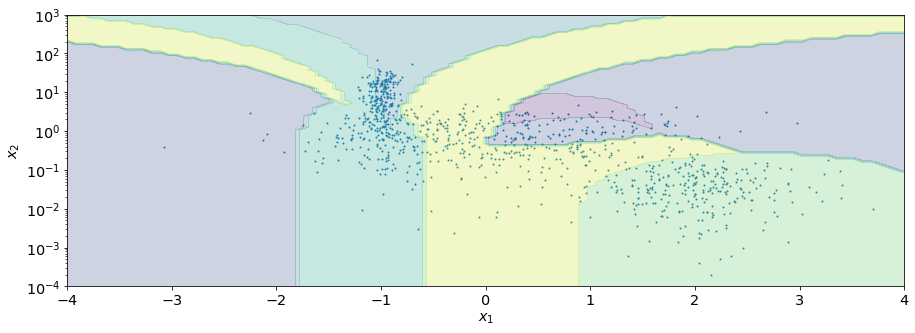

In [37]:
fig = plt.figure()
ax = plt.gca()
ax.set_yscale('log')
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1)
plt.xlabel(r'$x_1$')    
plt.ylabel(r'$x_2$')
plt.contourf(bins[0,:],bins[1,:],np.argmax(p,axis=0).T, alpha=0.25);

#### 5.2.2 Implement EM using $X_1$ and $X_2$ Features

The first step in EM Algorithm is to have an initial guess of the parameters.

In [38]:
def InitialGuess2(x,K):
    # generate an initial guess depending on the number of classes that are specified
    
    pi_h = np.ones(K)/K
    mu_h = np.mean(x.iloc[:,0])
    sigma_h = np.std(x.iloc[:,0])
    lambda_h = 1.0/np.mean(x.iloc[:,1])
    
    pi0 = pi_h*np.random.uniform(0.99,1.01,K)
    pi0 = pi0 / sum(pi0)
    
    mu0 = np.tile(mu_h,K) * np.random.uniform(0.99,1.01,K)
    sigma0 = np.tile(sigma_h,K)
    lambda0 = np.tile(lambda_h,K)*np.random.uniform(0.99,1.01,K)
    
    return pi0, mu0, sigma0, lambda0

The second step in EM Algorithm is to calculate the responsibilities.

In [39]:
def Responsibilities2(x,pi,mu,sigma,lmbda):
    K = pi.size
    g = np.zeros((K,x.shape[0]))
    
    for j in range(0,x.shape[0]):
        
        denom = 0
    
        for k in range(0,K):
            
            g[k,j] = pi[k]*st.norm.pdf(x.iloc[j,0],loc=mu[k],scale=sigma[k])*(lmbda[k]*np.exp(-lmbda[k]*x.iloc[j,1]))
            denom += g[k,j]
            
        for k in range(0,K):
            g[k,j] /= denom
    
    return g

The m-step update rules are based on the derivations in Section 5.1.

In [40]:
def EM2(x,pi,mu,sigma,lmbda):
    
    K = pi.size
    iteration = 100
    
    for m in range(iteration):
        
        # e-step
        gamma = Responsibilities2(x,pi,mu,sigma,lmbda)
        
        # compute update to pi
        numer = np.sum(gamma,axis=1)
        denom = np.sum(numer)
        pi = numer / denom
        
        # compute update to mu
        numer2 = np.matmul(gamma,x.iloc[:,0])
        denom2 = np.sum(gamma,axis=1)
        for k in range(0,K):
            mu[k] = numer2[k]/denom2[k]
        
        # compute update to sigma
        denom3 = np.sum(gamma,axis=1)
        for k in range(0,K):
            sigma[k] = np.sqrt(np.matmul(gamma[k,:],(np.subtract(x.iloc[:,0],mu[k]))**2)/denom3[k])
        
        # compute update to lambda
        numer4 = np.sum(gamma,axis=1)
        denom4 = np.matmul(gamma,x.iloc[:,1])
        for k in range(0,K):
            lmbda[k] = numer4[k]/denom4[k]
                
    return pi, mu, sigma, lmbda

In [41]:
# fitting the parameters using 3 classes
Kfit=3
print('-------- Kfit = ', Kfit, '-------- ')

# generate an initial guess
pi0, mu0, sigma0, lambda0 = InitialGuess2(x,Kfit)
    
print('   -- initial guess -- ')
print('\u03C0','\n',pi0,'\n\n','\u03BC','\n',mu0,'\n\n','\u03C3','\n',sigma0,'\n\n','\u03BB','\n',lambda0,'\n\n')

# use EM to update the estimate
pi1, mu1, sigma1, lambda1= EM2(x,pi0,mu0,sigma0,lambda0)
print('   -- estimated parameters -- ')
print('\u03C0','\n',pi1,'\n\n','\u03BC','\n',mu1,'\n\n','\u03C3','\n',sigma1,'\n\n','\u03BB','\n',lambda1,'\n\n')

-------- Kfit =  3 -------- 
   -- initial guess -- 
π 
 [0.33515996 0.33153537 0.33330467] 

 μ 
 [0.29139344 0.29440734 0.29255367] 

 σ 
 [1.30715395 1.30715395 1.30715395] 

 λ 
 [0.33902905 0.33985871 0.34046675] 


   -- estimated parameters -- 
π 
 [0.24727526 0.49204693 0.26067781] 

 μ 
 [-0.99428837  0.03449496  2.00484433] 

 σ 
 [0.09170384 0.93475462 0.51857616] 

 λ 
 [ 0.10123122  1.02292028 20.3993263 ] 




#### 5.2.3 Implement EM using $X_1$ and $X_3$ Features

The first step in EM Algorithm is to have an initial guess of the parameters.

In [42]:
def InitialGuess3(x,K):
    # generate an initial guess depending on the number of classes that are specified
    
    pi_h = np.ones(K)/K
    mu_h = np.mean(x.iloc[:,0])
    sigma_h = np.std(x.iloc[:,0])
    fi_h = np.ones(5)/5
    
    pi0 = pi_h*np.random.uniform(0.99,1.01,K)
    pi0 = pi0 / sum(pi0)
    fi0 = fi_h*np.random.uniform(0.99,1.01,5)
    fi0 = fi0 / sum(fi0)
    fi0 = np.tile(fi0,(K,1))
    
    mu0 = np.tile(mu_h,K) * np.random.uniform(0.99,1.01,K)
    sigma0 = np.tile(sigma_h,K)
    
    return pi0, mu0, sigma0, fi0

The second step in EM Algorithm is to calculate the responsibilities.

In [43]:
def Responsibilities3(x,pi,mu,sigma,fi):
    K = pi.size
    g = np.zeros((K,x.shape[0]))
    
    for j in range(0,x.shape[0]):
        
        denom = 0
    
        for k in range(0,K):
            
            g[k,j] = pi[k]*st.norm.pdf(x.iloc[j,0],loc=mu[k],scale=sigma[k])*fi[k,x.iloc[j,2]-1]
            denom += g[k,j]
            
        for k in range(0,K):
            g[k,j] /= denom
    
    return g

The m-step update rules are based on the derivations in Section 5.1.

In [44]:
def EM3(x,pi,mu,sigma,fi):
    
    K = pi.size
    iteration = 100
    
    for m in range(iteration):
        
        # e-step
        gamma = Responsibilities3(x,pi,mu,sigma,fi)
        
        # compute update to pi
        numer = np.sum(gamma,axis=1)
        denom = np.sum(numer)
        pi = numer / denom
        
        # compute update to mu
        numer2 = np.matmul(gamma,x.iloc[:,0])
        denom2 = np.sum(gamma,axis=1)
        for k in range(0,K):
            mu[k] = numer2[k]/denom2[k]
        
        # compute update to sigma
        denom3 = np.sum(gamma,axis=1)
        for k in range(0,K):
            sigma[k] = np.sqrt(np.matmul(gamma[k,:],(np.subtract(x.iloc[:,0],mu[k]))**2)/denom3[k])
        
        # extract each category's data index
        category1 = []
        category2 = []
        category3 = []
        category4 = []
        category5 = []
        for j in range(x.shape[0]):
            if x.iloc[j,2] == 1:
                category1.append(j)
            if x.iloc[j,2] == 2:
                category2.append(j)
            if x.iloc[j,2] == 3:
                category3.append(j)
            if x.iloc[j,2] == 4:
                category4.append(j)
            if x.iloc[j,2] == 5:
                category5.append(j)
        
        # compute update to fi when category is 1
        denom5 = np.sum(gamma,axis=1)
        for k in range(0,K):
            numer5 = 0
            for index in category1:
                numer5 += gamma[k,index]
                fi[k,0] = numer5/denom5[k]
        
        # compute update to fi when category is 2
        for k in range(0,K):
            numer5 = 0
            for index in category2:
                numer5 += gamma[k,index]
                fi[k,1] = numer5/denom5[k]
                
        # compute update to fi when category is 3
        for k in range(0,K):
            numer5 = 0
            for index in category3:
                numer5 += gamma[k,index]
                fi[k,2] = numer5/denom5[k]

        # compute update to fi when category is 4
        for k in range(0,K):
            numer5 = 0
            for index in category4:
                numer5 += gamma[k,index]
                fi[k,3] = numer5/denom5[k]

        # compute update to fi when category is 5
        for k in range(0,K):
            numer5 = 0
            for index in category5:
                numer5 += gamma[k,index]
                fi[k,4] = numer5/denom5[k]
                
    return pi, mu, sigma, fi

In [45]:
# fitting the parameters using 3 classes
Kfit=3
print('-------- Kfit = ', Kfit, '-------- ')

# generate an initial guess    
pi0, mu0, sigma0, fi0 = InitialGuess3(x,Kfit)
    
print('   -- initial guess -- ')
print('\u03C0','\n',pi0,'\n\n','\u03BC','\n',mu0,'\n\n','\u03C3','\n',sigma0,'\n\n','\u03C8','\n',fi0)

# use EM to update the estimate
pi1, mu1, sigma1, fi1 = EM3(x,pi0,mu0,sigma0,fi0)

print('\n')
print('   -- estimated parameters -- ')
print('\u03C0','\n',pi1,'\n\n','\u03BC','\n',mu1,'\n\n','\u03C3','\n',sigma1,'\n\n','\u03C8','\n',fi1)

-------- Kfit =  3 -------- 
   -- initial guess -- 
π 
 [0.33168804 0.3357913  0.33252066] 

 μ 
 [0.29292585 0.29443013 0.29119534] 

 σ 
 [1.30715395 1.30715395 1.30715395] 

 ψ 
 [[0.20037501 0.19833296 0.2002403  0.19967474 0.20137699]
 [0.20037501 0.19833296 0.2002403  0.19967474 0.20137699]
 [0.20037501 0.19833296 0.2002403  0.19967474 0.20137699]]


   -- estimated parameters -- 
π 
 [0.45649215 0.28844563 0.25506222] 

 μ 
 [-0.04128372  1.96472511 -0.99639228] 

 σ 
 [0.86772023 0.5315948  0.0941251 ] 

 ψ 
 [[4.70971863e-41 2.30873714e-40 4.85456450e-01 2.58239662e-01
  2.56303888e-01]
 [2.01480741e-01 1.59795073e-01 2.65980934e-01 1.98106704e-01
  1.74636548e-01]
 [1.02140167e-01 1.80709550e-01 6.68894751e-01 3.26953200e-02
  1.55602125e-02]]


#### 5.2.4 Implement EM using $X_2$ and $X_3$ Features

The first step in EM Algorithm is to have an initial guess of the parameters.

In [46]:
def InitialGuess4(x,K):
    # generate an initial guess depending on the number of classes that are specified
    
    pi_h = np.ones(K)/K
    lambda_h = 1.0/np.mean(x.iloc[:,1])
    fi_h = np.ones(5)/5
    
    pi0 = pi_h*np.random.uniform(0.99,1.01,K)
    pi0 = pi0 / sum(pi0)
    fi0 = fi_h*np.random.uniform(0.99,1.01,5)
    fi0 = fi0 / sum(fi0)
    fi0 = np.tile(fi0,(K,1))

    lambda0 = np.tile(lambda_h,K)*np.random.uniform(0.99,1.01,K)
    
    return pi0, lambda0, fi0

The second step in EM Algorithm is to calculate the responsibilities.

In [47]:
def Responsibilities4(x,pi,lmbda,fi):
    K = pi.size
    g = np.zeros((K,x.shape[0]))
    
    for j in range(0,x.shape[0]):
        
        denom = 0
    
        for k in range(0,K):
            
            g[k,j] = pi[k]*(lmbda[k]*np.exp(-lmbda[k]*x.iloc[j,1]))*fi[k,x.iloc[j,2]-1]
            denom += g[k,j]
            
        for k in range(0,K):
            g[k,j] /= denom
    
    return g

The m-step update rules are based on the derivations in Section 5.1.

In [48]:
def EM4(x,pi,lmbda,fi):
    
    K = pi.size
    iteration = 100
    
    for m in range(iteration):
        
        # e-step
        gamma = Responsibilities4(x,pi,lmbda,fi)
        
        # compute update to pi
        numer = np.sum(gamma,axis=1)
        denom = np.sum(numer)
        pi = numer / denom
        
        # compute update to lambda
        numer4 = np.sum(gamma,axis=1)
        denom4 = np.matmul(gamma,x.iloc[:,1])
        for k in range(0,K):
            lmbda[k] = numer4[k]/denom4[k]
        
        # extract each category's data index
        category1 = []
        category2 = []
        category3 = []
        category4 = []
        category5 = []
        for j in range(x.shape[0]):
            if x.iloc[j,2] == 1:
                category1.append(j)
            if x.iloc[j,2] == 2:
                category2.append(j)
            if x.iloc[j,2] == 3:
                category3.append(j)
            if x.iloc[j,2] == 4:
                category4.append(j)
            if x.iloc[j,2] == 5:
                category5.append(j)
        
        # compute update to fi when category is 1
        denom5 = np.sum(gamma,axis=1)
        for k in range(0,K):
            numer5 = 0
            for index in category1:
                numer5 += gamma[k,index]
                fi[k,0] = numer5/denom5[k]
        
        # compute update to fi when category is 2
        for k in range(0,K):
            numer5 = 0
            for index in category2:
                numer5 += gamma[k,index]
                fi[k,1] = numer5/denom5[k]
                
        # compute update to fi when category is 3
        for k in range(0,K):
            numer5 = 0
            for index in category3:
                numer5 += gamma[k,index]
                fi[k,2] = numer5/denom5[k]

        # compute update to fi when category is 4
        for k in range(0,K):
            numer5 = 0
            for index in category4:
                numer5 += gamma[k,index]
                fi[k,3] = numer5/denom5[k]

        # compute update to fi when category is 5
        for k in range(0,K):
            numer5 = 0
            for index in category5:
                numer5 += gamma[k,index]
                fi[k,4] = numer5/denom5[k]
                
    return pi, lmbda, fi

In [49]:
# fitting the parameters using 3 classes
Kfit=3
print('-------- Kfit = ', Kfit, '-------- ')

# generate an initial guess
pi0, lambda0, fi0 = InitialGuess4(x,Kfit)
    
print('   -- initial guess -- ')
print('\u03C0','\n',pi0,'\n\n','\u03BB','\n',lambda0,'\n\n','\u03C8','\n',fi0)

# use EM to update the estimate
pi1, lambda1, fi1, = EM4(x,pi0,lambda0,fi0)

print('\n')
print('   -- estimated parameters -- ')
print('\u03C0','\n',pi1,'\n\n','\u03BB','\n',lambda1,'\n\n','\u03C8','\n',fi1)

-------- Kfit =  3 -------- 
   -- initial guess -- 
π 
 [0.33286096 0.33053432 0.33660471] 

 λ 
 [0.33871814 0.34187531 0.34136507] 

 ψ 
 [[0.19948794 0.19921708 0.20010023 0.2008051  0.20038966]
 [0.19948794 0.19921708 0.20010023 0.2008051  0.20038966]
 [0.19948794 0.19921708 0.20010023 0.2008051  0.20038966]]


   -- estimated parameters -- 
π 
 [0.22601021 0.2500382  0.52395158] 

 λ 
 [ 0.09379636 21.00680173  1.01739842] 

 ψ 
 [[1.07647640e-01 1.99132350e-01 6.93220009e-01 3.62320461e-45
  5.21145152e-17]
 [2.32979347e-01 1.88684862e-01 2.29023623e-01 1.95422812e-01
  1.53889357e-01]
 [3.02534263e-03 1.39742150e-21 4.86683173e-01 2.56709911e-01
  2.53581573e-01]]


## 6. Classify the Festures with Known Lables

In this part, I generate the classification boundaris in dimensions 1 and dimensions 2 for various of dimension 3. 

For this part, $X_3$ is our known lables and we have five groups.

The (posterior) probability that a point in feature space comes from a given class $\gamma_{k}(x)=\mathbb P(X=x|Y=k)$ and equals using Bayes rule:

$$\gamma_{k(x)} = \frac{\pi_k f_{X1|Y}f_{X2|y}}{\sum_{k\epsilon K}\pi_k f_{X1|Y}f_{X2|y}}$$

Where, we know that $X1|Y \sim N(\mu_Y;\sigma^2_Y)$ and $X2|Y \sim exp(\lambda_Y)$, thus we will have

$$\gamma_{k(x)} = \frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x1-\mu}{\sigma})^2}\lambda e^{-\lambda x2}}{\sum_{k\epsilon K}\pi_k \frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-1}{2}(\frac{x1-\mu}{\sigma})^2}\lambda e^{-\lambda x2}}$$

Our boundary rule is to find $argmax_{y\epsilon {1,2,3,4,5}}$ {the posterior distribution}

Specifically, we need to find $argmax_{y\epsilon {1,2,3,4,5}}$     $\gamma_{k(x)}$

In [50]:
# calculate pi
count = data_processed["X3"].count()
count1 = data_processed[data_processed['X3']==1]
count2 = data_processed[data_processed['X3']==2]
count3 = data_processed[data_processed['X3']==3]
count4 = data_processed[data_processed['X3']==4]
count5 = data_processed[data_processed['X3']==5]

pi1_f = count1.shape[0]/count
pi2_f = count2.shape[0]/count
pi3_f = count3.shape[0]/count
pi4_f = count4.shape[0]/count
pi5_f = count5.shape[0]/count

pi_f = [pi1_f, pi2_f, pi3_f, pi4_f, pi5_f]

In [51]:
# calculate mu
m = data_processed.groupby('X3').mean()
mu_f = m.iloc[:, 0]
mu_f = list(mu_f)

In [52]:
# calculate sigma
s = data_processed.groupby('X3').std()
std_f = s.iloc[:, 0]
std_f = list(std_f)

In [53]:
# calculate lambda
mu2_f = m.iloc[:, 1]
lmbda_f = list(1/mu2_f)

In [54]:
x = data_processed.iloc[:,:3]

In [55]:
# compute the posterior probability of a point in feature space being from a given class
def Posterior(x,pi,lmbda,mu,sigma):
    K = 5
    
    p = np.zeros((K,x.shape[0]))
    

    for j in range(0,x.shape[0]): 
                 
            denom = 0
            
            for k in range(0,K):
                 p[k,j] = pi[k]*(lmbda[k]*np.exp(-x.iloc[j,1]*lmbda[k]))*st.norm.pdf(x.iloc[j,0],loc=mu[k],scale=sigma[k])
                 
                 denom += p[k,j]

            for k in range(0,K):
                 p[k,j] /= denom
                 
    return p

In [56]:
p = Posterior(x,pi_f,lmbda_f,mu_f,std_f)
p

array([[0.1194973 , 0.04564111, 0.16335027, ..., 0.04465315, 0.02677689,
        0.05241352],
       [0.04173179, 0.05723274, 0.05287099, ..., 0.02417854, 0.02247315,
        0.02294176],
       [0.06033168, 0.59407495, 0.04412448, ..., 0.17585554, 0.26455731,
        0.10475691],
       [0.46367601, 0.13515181, 0.44273145, ..., 0.43460842, 0.40058924,
        0.49315217],
       [0.31476322, 0.1678994 , 0.29692281, ..., 0.32070435, 0.28560341,
        0.32673564]])

The result for calssfication is here, it shows the classifiication group of each point

In [57]:
np.argmax(p,axis=0)

array([3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3,
       2, 3, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3,
       2, 3, 3, 2, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2,
       3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3,
       2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1,
       2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       2, 2, 3, 3, 2, 3, 2, 4, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3,
       2, 4, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 0, 2,

## 7. Model Selection

In order to apply the BIC criterion to determine the optimal number of hidden states, we first need to implement a function to calculate the log likelihood.
\begin{equation}
B I C(\operatorname{Model} j)=-\ell_{j}\left(\hat{\theta}_{j}\right)+\frac{1}{2} d_{j} \log (n)
\end{equation}

In [58]:
def loglike(x,pi,mu,sigma,lmbda,fi):    
    gamma = Responsibilities(x,pi,mu,sigma,lmbda,fi)
    
    # fi is a 3*5 matrix
    logl = 0
    for k in range(pi.shape[0]):
        for j in range(x.shape[0]):
            if lmbda[k] * np.exp(-x.iloc[j,1]*lmbda[k]) != 0 and st.norm.pdf(x.iloc[j,0], loc=mu[k], scale=sigma[k]) != 0:
                logl += gamma[k,j] * (np.log(pi[k])
                        + st.norm.logpdf(x.iloc[j,0], loc=mu[k], scale=sigma[k])
                        + np.log(lmbda[k] * np.exp(-x.iloc[j,1]*lmbda[k]))
                        + np.log(fi[k,x.iloc[j,2]-1]))
            
    return logl

In [59]:
def BIC(x,pi,mu,sigma,lmbda,fi):
    K = pi.shape[0]
    n = x.shape[0] # Number of Observations
    d = x.shape[1] # Number of Feathers
    
    # number of free parameters
    # pi : K
    # mu : K*1
    # Sigma : K*1
    # Lambda : K*1
    # Phi: K*(5-1)
    return -loglike(x,pi,mu,sigma,lmbda,fi) + 0.5*(K + K*3 + K*4)*np.log(n)

In [60]:
# this cell may take very long time to run
class_bic = []

# largest number of possible classes
Kfitmax=7

# calculate BIC considering all features
for Kfit in range(3,Kfitmax+1):
    pi0, mu0, sigma0, lambda0, fi0 = InitialGuess(x,Kfit)
    pi1, mu1, sigma1, lambda1, fi1 = EM(x,pi0,mu0,sigma0,lambda0,fi0)
    BIC_value = BIC(x,pi1,mu1,sigma1,lambda1,fi1)
    class_bic.append((Kfit,BIC_value))

class_bic_df = pd.DataFrame(class_bic, columns=["K","BIC Value"])
class_bic_df.sort_values('BIC Value')

,K,BIC Value
0,3,3649.076526
1,4,3882.354901
2,5,4020.558693
3,6,4189.404122
4,7,4350.769241


As seen from the above table, class number of 3 provides a lowest BIC value.